In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [4]:
df.isnull().sum()/len(df) * 100

customer_ID           0.000000
shopping_pt           0.000000
record_type           0.000000
day                   0.000000
time                  0.000000
state                 0.000000
location              0.000000
group_size            0.000000
homeowner             0.000000
car_age               0.000000
car_value             0.230139
risk_factor          36.139551
age_oldest            0.000000
age_youngest          0.000000
married_couple        0.000000
C_previous            2.812631
duration_previous     2.812631
A                     0.000000
B                     0.000000
C                     0.000000
D                     0.000000
E                     0.000000
F                     0.000000
G                     0.000000
cost                  0.000000
dtype: float64

In [5]:
''' More than 36% of ur data is null'''
df.drop(['risk_factor'],axis=1, inplace=True)
df.drop(['time'],axis=1, inplace= True)

In [6]:
''' We see that more than 30% has  e, so filling with e val(using mode to fill)'''
df['car_value'].value_counts()/len(df) * 100

e    32.957735
f    26.637244
d    17.012277
g    14.754175
h     4.355662
c     3.129655
i     0.541602
b     0.210748
a     0.170763
Name: car_value, dtype: float64

In [7]:
df['car_value'] = df['car_value'].fillna('e')

In [8]:
df.isnull().sum()/len(df) * 100

customer_ID          0.000000
shopping_pt          0.000000
record_type          0.000000
day                  0.000000
state                0.000000
location             0.000000
group_size           0.000000
homeowner            0.000000
car_age              0.000000
car_value            0.000000
age_oldest           0.000000
age_youngest         0.000000
married_couple       0.000000
C_previous           2.812631
duration_previous    2.812631
A                    0.000000
B                    0.000000
C                    0.000000
D                    0.000000
E                    0.000000
F                    0.000000
G                    0.000000
cost                 0.000000
dtype: float64

In [9]:
''' 2% data na, so lets drop those rows'''
df = df.dropna()

In [10]:
df.isnull().sum()/len(df) * 100

customer_ID          0.0
shopping_pt          0.0
record_type          0.0
day                  0.0
state                0.0
location             0.0
group_size           0.0
homeowner            0.0
car_age              0.0
car_value            0.0
age_oldest           0.0
age_youngest         0.0
married_couple       0.0
C_previous           0.0
duration_previous    0.0
A                    0.0
B                    0.0
C                    0.0
D                    0.0
E                    0.0
F                    0.0
G                    0.0
cost                 0.0
dtype: float64

In [11]:
df.head()

,customer_ID,shopping_pt,record_type,day,state,location,group_size,homeowner,car_age,car_value,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630


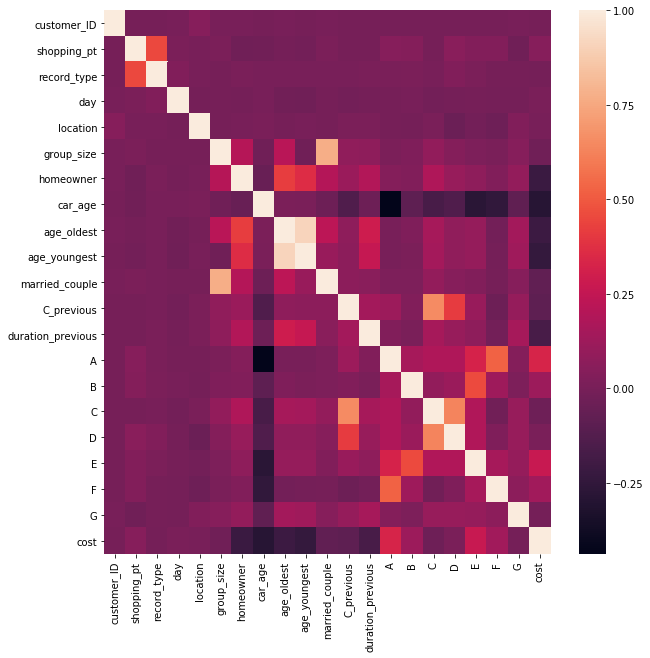

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [13]:
df.corr()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,age_oldest,age_youngest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
customer_ID,1.000000,0.000382,-0.000003,0.002111,0.049266,0.005742,0.000788,-0.002806,0.002786,0.000226,...,-0.004146,-0.000737,-0.001630,-0.002769,0.000350,-0.000116,-0.002897,-0.001346,0.002144,-0.001794
shopping_pt,0.000382,1.000000,0.454500,0.012892,0.001324,0.011919,-0.023694,-0.019796,-0.006037,-0.012476,...,-0.002259,-0.004659,0.047411,0.042779,-0.005089,0.059280,0.038064,0.037600,-0.025995,0.047738
record_type,-0.000003,0.454500,1.000000,0.032613,0.001144,0.000322,0.006616,0.003825,0.003282,0.001391,...,0.003744,0.007947,0.009838,0.015911,0.003869,0.029297,0.011938,0.000207,0.000231,-0.009105
day,0.002111,0.012892,0.032613,1.000000,-0.010529,-0.001130,-0.005988,0.003322,-0.020996,-0.023304,...,-0.010852,-0.006710,-0.001831,0.001165,-0.012612,-0.007596,-0.004623,-0.006563,-0.009254,0.011255
location,0.049266,0.001324,0.001144,-0.010529,1.000000,-0.004397,0.000662,0.008769,-0.001403,0.000678,...,0.014698,0.016669,-0.003733,-0.008701,0.009189,-0.041956,-0.013094,-0.031841,0.029685,0.003580
group_size,0.005742,0.011919,0.000322,-0.001130,-0.004397,1.000000,0.203248,-0.023990,0.217094,-0.025213,...,0.079346,0.074635,0.015317,0.027036,0.087316,0.044136,0.020610,0.010010,0.047732,-0.023598
homeowner,0.000788,-0.023694,0.006616,-0.005988,0.000662,0.203248,1.000000,-0.050638,0.418309,0.365287,...,0.116108,0.193181,0.045356,0.031113,0.182609,0.106454,0.077328,0.030310,0.093928,-0.215971
car_age,-0.002806,-0.019796,0.003825,0.003322,0.008769,-0.023990,-0.050638,1.000000,0.011720,0.007748,...,-0.139923,-0.037537,-0.437574,-0.087369,-0.166578,-0.137499,-0.277333,-0.247200,-0.083614,-0.286933
age_oldest,0.002786,-0.006037,0.003282,-0.020996,-0.001403,0.217094,0.418309,0.011720,1.000000,0.913263,...,0.078344,0.288918,0.001753,0.023079,0.156537,0.082427,0.098290,-0.012733,0.142720,-0.211332
age_youngest,0.000226,-0.012476,0.001391,-0.023304,0.000678,-0.025213,0.365287,0.007748,0.913263,1.000000,...,0.071151,0.259316,0.003312,0.015798,0.150080,0.081143,0.097478,-0.007791,0.134393,-0.240513


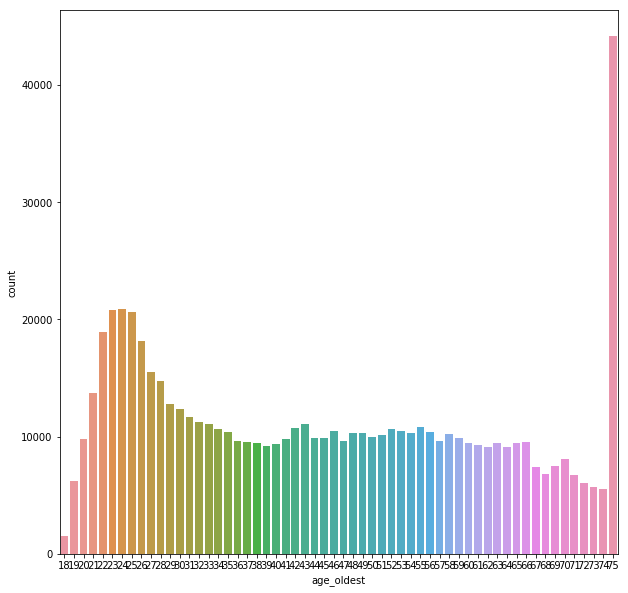

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['age_oldest'])#df['age_youngest'])

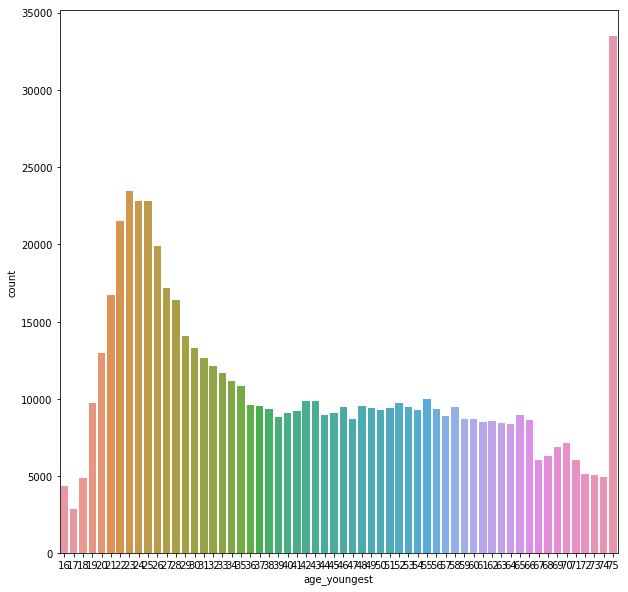

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['age_youngest'])

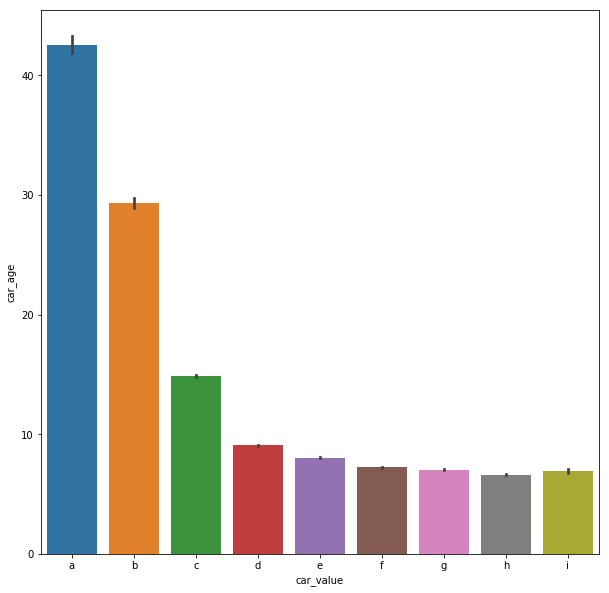

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['car_value'], y=df['car_age'], order=sorted(df['car_value'].unique()))

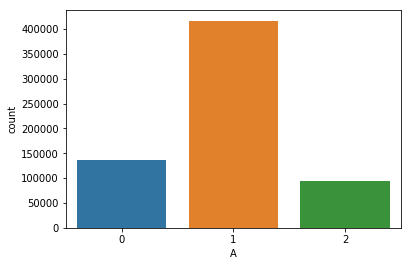

In [17]:
sns.countplot(df['A'])

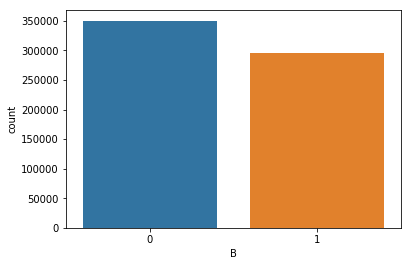

In [18]:
sns.countplot(df['B'])

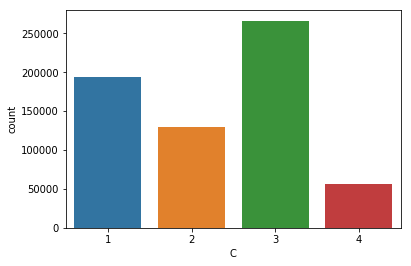

In [19]:
sns.countplot(df['C'])

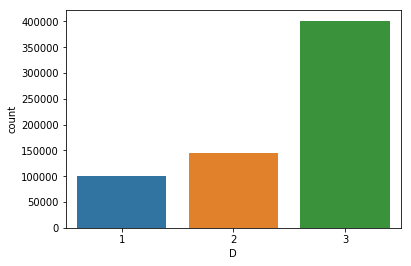

In [20]:
sns.countplot(df['D'])

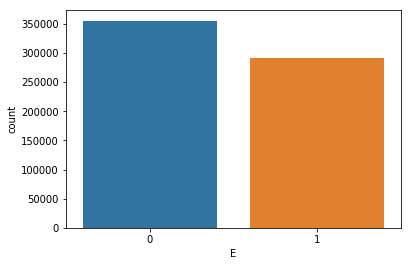

In [21]:
sns.countplot(df['E'])

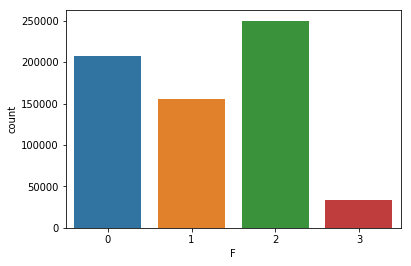

In [22]:
sns.countplot(df['F'])

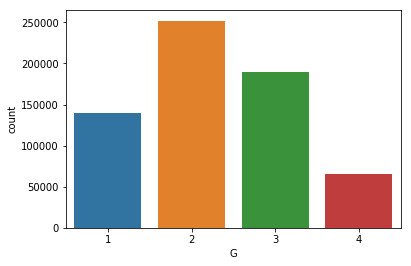

In [23]:
sns.countplot(df['G'])

In [24]:
purchased_df = df[df['record_type']==1][['customer_ID','cost','day', 'A','B','C','D','E','F', 'G']].reset_index(drop = True)
#purchased_df.to_csv('Purchased_data.csv')

In [25]:
''' Cust id shouldnt influence ur model'''
#df.drop('customer_ID', axis = 1, inplace=True)
#df.iloc[int(len(df['customer_ID'].unique())*.8)]['customer_ID']

' Cust id shouldnt influence ur model'

In [26]:
df_new = df[df['record_type']==0]

In [27]:
df_new.head(10)

,customer_ID,shopping_pt,record_type,day,state,location,group_size,homeowner,car_age,car_value,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,630
5,10000000,6,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,638
6,10000000,7,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,638
7,10000000,8,0,0,IN,10001,2,0,2,g,...,1.0,2.0,1,0,2,2,1,2,1,638
9,10000005,1,0,3,NY,10006,1,0,10,e,...,3.0,13.0,1,1,3,3,1,0,2,755
10,10000005,2,0,3,NY,10006,1,0,10,e,...,3.0,13.0,1,1,3,3,1,0,2,755


In [28]:
df_new.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'cost'],
      dtype='object')

In [29]:
def get_transformed(id_col,col_name,df, min_max):
    if min_max=='max':
        df[col_name]=df.groupby(id_col)[col_name].transform('max')
    else:
        df[col_name]=df.groupby(id_col)[col_name].transform('min')
    return df

In [30]:
# df_new['married_couple'] = df_new.groupby("customer_ID").cummax()['married_couple']
# df_new[['customer_ID', 'married_couple']]
df_new = get_transformed('customer_ID', col_name='married_couple', df=df_new, min_max='max')
df_new = get_transformed('customer_ID', col_name='age_oldest', df=df_new, min_max='max')
df_new = get_transformed('customer_ID', col_name='duration_previous', df=df_new,min_max='max')
df_new = get_transformed('customer_ID', col_name='C_previous', df=df_new,min_max='max')
df_new = get_transformed('customer_ID', col_name='group_size', df=df_new,min_max='max')


df_new = get_transformed('customer_ID', col_name='age_youngest', df=df_new, min_max='min')
df_new = get_transformed('customer_ID', col_name='homeowner', df=df_new,min_max='max')
df_new = get_transformed('customer_ID', col_name='car_value', df=df_new,min_max='max')
df_new = get_transformed('customer_ID', col_name='car_age', df=df_new,min_max='max')

/colt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/colt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [31]:
df_new.to_csv('cumm_data_processed.csv')

In [32]:
#df_new['location'].value_counts()
df_new.columns =['customer_ID', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A_rec0', 'B_rec0', 'C_rec0', 'D_rec0', 'E_rec0', 'F_rec0', 'G_rec0', 'cost']

In [33]:
''' This info we have in purchased_df'''
df_new.drop(['cost','day'], axis = 1, inplace=True)

/colt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
len(df_new['customer_ID'].unique())

95338

In [35]:
''' state, day, loc, car_val, '''
def get_dummies_data(col, df):
    df_state= pd.get_dummies(df[col],drop_first=True)
    df = pd.concat([df.drop(col, axis = 1),df_state], axis =1)
    return df

In [36]:
df_dummies = pd.get_dummies(df_new, columns=['state', 'car_value','A_rec0', 'B_rec0', 'C_rec0', 'D_rec0', 'E_rec0', 'F_rec0', 'G_rec0'])

In [37]:
df_dummies.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'location', 'group_size',
       'homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple',
       'C_previous', 'duration_previous', 'state_AL', 'state_AR', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA',
       'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD', 'state_ME',
       'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE', 'state_NH',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_UT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'car_value_a', 'car_value_b',
       'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
       'car_value_g', 'car_value_h', 'car_value_i', 'A_rec0_0', 'A_rec0_1',
       'A_rec0_2', 'B_rec0_0', 'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3',
       'C_rec0_4', 'D_rec0_1', 'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_

In [38]:
def get_shopped_df(df_dummies, grp_by_col_list):
    shopped_df = df_dummies.groupby(grp_by_col_list)[['A_rec0_0', 'A_rec0_1',
           'A_rec0_2', 'B_rec0_0', 'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3',
           'C_rec0_4', 'D_rec0_1', 'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1',
           'F_rec0_0', 'F_rec0_1', 'F_rec0_2', 'F_rec0_3', 'G_rec0_1', 'G_rec0_2',
           'G_rec0_3', 'G_rec0_4']].sum().reset_index(drop = False)#.to_csv('preprocessed.csv')
    return shopped_df

In [39]:
grp_by_col_list = ['customer_ID','group_size',
           'homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple',
           'C_previous', 'duration_previous', 'state_AL', 'state_AR', 'state_CO',
           'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA',
           'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD', 'state_ME',
           'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE', 'state_NH',
           'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
           'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_UT', 'state_WA',
           'state_WI', 'state_WV', 'state_WY', 'car_value_a', 'car_value_b',
           'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
           'car_value_g', 'car_value_h', 'car_value_i']
shopped_df = get_shopped_df(df_dummies, grp_by_col_list)

In [40]:
#final_df = shopped_df.merge(purchased_df, on ='customer_ID')
final_df = pd.merge(shopped_df,purchased_df, on='customer_ID')

In [41]:
final_df.to_csv('Final_preprocessed.csv')

In [42]:
final_df.columns

Index(['customer_ID', 'group_size', 'homeowner', 'car_age', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'state_AL', 'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS',
       'state_KY', 'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT',
       'state_ND', 'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD',
       'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_a', 'car_value_b', 'car_value_c', 'car_value_d',
       'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h',
       'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2', 'B_rec0_0',
       'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4', 'D_rec0_1',
       'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1', 'F_rec0_0', 'F_rec0_1',
       'F_rec0

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=final_df.drop([ 'customer_ID','A', 'B', 'C', 'D', 'E', 'F', 'G'], axis = 1)
y_a=final_df['A']
y_b=final_df['B']
y_c=final_df['C']
y_d=final_df['D']
y_e=final_df['E']
y_f=final_df['F']
y_g=final_df['G']

In [45]:
X.columns

Index(['group_size', 'homeowner', 'car_age', 'age_oldest', 'age_youngest',
       'married_couple', 'C_previous', 'duration_previous', 'state_AL',
       'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY',
       'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND',
       'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD', 'state_TN',
       'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_a', 'car_value_b', 'car_value_c', 'car_value_d',
       'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h',
       'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2', 'B_rec0_0',
       'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4', 'D_rec0_1',
       'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1', 'F_rec0_0', 'F_rec0_1',
       'F_rec0_2', 'F_rec0_3'

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [48]:
X_train, X_test, y_train, y_test_a = train_test_split(X, y_a, test_size=0.20, random_state=42)
classifier_a = RandomForestClassifier(n_estimators=10 ,random_state=42 ,class_weight={0:1.5,1:1,2:1.5})
classifier_a.fit(X_train, y_train)

y_pred_a = classifier_a.predict(X_test)
y_pred_a = pd.DataFrame(y_pred_a)
pred_df = pd.concat([y_test_a,y_pred_a], axis = 1)
pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_a,y_pred_a,labels=[0,1,2])

array([[ 3673,   365,    80],
       [  250, 11247,   310],
       [  102,   690,  2325]])

In [49]:
X_train, X_test, y_train, y_test_b = train_test_split(X, y_b, test_size=0.20, random_state=42)
classifier_b = RandomForestClassifier(random_state=42)#,class_weight={0:1,1:1,2:2})
classifier_b.fit(X_train, y_train)

y_pred_b = classifier_b.predict(X_test)
y_pred_b = pd.DataFrame(y_pred_b)
pred_df = pd.concat([y_test_b,y_pred_b], axis = 1)
pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_b,y_pred_b)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[9228,  842],
       [1058, 7914]])

In [50]:
X_train, X_test, y_train, y_test_c = train_test_split(X, y_c, test_size=0.20, random_state=42)
classifier_c = RandomForestClassifier(random_state=42)#,class_weight={0:1,1:1,2:2})
classifier_c.fit(X_train, y_train)

y_pred_c = classifier_c.predict(X_test)
y_pred_c = pd.DataFrame(y_pred_c)
pred_df = pd.concat([y_test_c,y_pred_c], axis = 1)
pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_c,y_pred_c)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[5111,  268,  187,   10],
       [ 312, 3369,  316,   17],
       [ 200,  260, 6930,  121],
       [  23,   26,  224, 1668]])

In [51]:
X_train, X_test, y_train, y_test_d = train_test_split(X, y_d, test_size=0.20, random_state=42)
classifier_d = RandomForestClassifier(random_state=42)#,class_weight={1:2,2:1.5,3:1})
classifier_d.fit(X_train, y_train)

y_pred_d = classifier_d.predict(X_test)
y_pred_d = pd.DataFrame(y_pred_d)
pred_df = pd.concat([y_test_d,y_pred_d], axis = 1)
pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_d,y_pred_d)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[ 2170,   146,   143],
       [  189,  3720,   339],
       [  162,   428, 11745]])

In [52]:
X_train, X_test, y_train, y_test_e = train_test_split(X, y_e, test_size=0.20, random_state=42)
classifier_e = RandomForestClassifier(random_state=42)#,class_weight={0:1,1:1,2:2})
classifier_e.fit(X_train, y_train)

y_pred_e = classifier_e.predict(X_test)
y_pred_e = pd.DataFrame(y_pred_e)
pred_df = pd.concat([y_test_e,y_pred_e], axis = 1)
pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_e,y_pred_e)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[9445,  688],
       [1048, 7861]])

In [53]:
X_train, X_test, y_train, y_test_f = train_test_split(X, y_f, test_size=0.20, random_state=42)
classifier_f = RandomForestClassifier(random_state=42,class_weight={0:1,1:1.1,2:1, 3:1.9})
classifier_f.fit(X_train, y_train)

y_pred_f = classifier_f.predict(X_test)
y_pred_f = pd.DataFrame(y_pred_f)
pred_df = pd.concat([y_test_f,y_pred_f], axis = 1)
#pred_df.columns = ['y_Test', 'Predicted']
confusion_matrix(y_test_f,y_pred_f)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[5712,  114,  221,   24],
       [  99, 4112,  437,   28],
       [ 182,  399, 6518,  122],
       [  44,   45,  236,  749]])

In [54]:
X_train, X_test, y_train, y_test_g = train_test_split(X, y_g, test_size=0.20, random_state=42)
classifier_g = RandomForestClassifier(random_state=42,class_weight={1:1.2,2:1,3:1.1, 4:1.1})
classifier_g.fit(X_train, y_train)

y_pred_g = classifier_g.predict(X_test)
y_pred_g = pd.DataFrame(y_pred_g)
confusion_matrix(y_test_g,y_pred_g)#,labels=[0,1,2])

/colt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[3180,  607,  128,   26],
       [ 682, 6403,  303,   79],
       [ 222,  512, 5119,  119],
       [  86,  228,  353,  995]])

In [55]:
def acc_colwise(pred_df, target, col):
    y_pred_a = pred_df
    target_a = target.to_frame().reset_index(drop = True)
    acc_a = pd.concat([target_a, y_pred_a], axis = 1)
    acc_a.columns = ['Target', 'Predicted']
    acc_a['acc'] = acc_a['Target'] == acc_a['Predicted']
    accuracy = acc_a['acc'].value_counts()[1]/(acc_a['acc'].value_counts()[1]+acc_a['acc'].value_counts()[0])
    print('Accuracy for product {} is {}'.format(col,accuracy))

In [56]:
acc_colwise(y_pred_a, y_test_a, 'A')
acc_colwise(y_pred_b, y_test_b, 'B')
acc_colwise(y_pred_c, y_test_c, 'C')
acc_colwise(y_pred_d, y_test_d, 'D')
acc_colwise(y_pred_e, y_test_e, 'E')
acc_colwise(y_pred_f, y_test_f, 'F')
acc_colwise(y_pred_g, y_test_g, 'G')

Accuracy for product A is 0.9056296607499212
Accuracy for product B is 0.9002205650666947
Accuracy for product C is 0.8968595735742044
Accuracy for product D is 0.9261107026572839
Accuracy for product E is 0.908833105766201
Accuracy for product F is 0.8975422749711165
Accuracy for product G is 0.8243356790253125


#### Test data

In [89]:
test_df = pd.read_csv('test.csv')

In [90]:
test_df.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000001,1,0,1,12:35,OK,10002.0,1,0,9,...,3.0,9.0,0,0,1,1,0,0,4,543
1,10000001,2,0,1,12:36,OK,10002.0,1,0,9,...,3.0,9.0,2,1,1,3,1,3,2,611
2,10000002,1,0,4,12:19,PA,10003.0,1,1,7,...,2.0,15.0,2,0,2,3,1,2,2,691
3,10000002,2,0,4,12:21,PA,10003.0,1,1,7,...,2.0,15.0,2,0,2,3,1,2,2,695
4,10000003,1,0,3,17:12,AR,10004.0,1,0,4,...,3.0,1.0,1,0,1,1,0,2,2,628


In [91]:
test_df.drop('time', axis = 1, inplace=True)
test_df.drop('risk_factor', axis = 1, inplace=True)

In [92]:
test_df.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'cost'],
      dtype='object')

In [93]:
test_df = get_transformed('customer_ID', col_name='married_couple', df=test_df, min_max='max')
test_df = get_transformed('customer_ID', col_name='age_oldest', df=test_df, min_max='max')
test_df = get_transformed('customer_ID', col_name='duration_previous', df=test_df,min_max='max')
test_df = get_transformed('customer_ID', col_name='C_previous', df=test_df,min_max='max')
test_df = get_transformed('customer_ID', col_name='group_size', df=test_df,min_max='max')


test_df = get_transformed('customer_ID', col_name='age_youngest', df=test_df, min_max='min')
test_df = get_transformed('customer_ID', col_name='homeowner', df=test_df,min_max='max')
test_df = get_transformed('customer_ID', col_name='day', df=test_df,min_max='max')
test_df = get_transformed('customer_ID', col_name='cost', df=test_df,min_max='max')
test_df = get_transformed('customer_ID', col_name='car_age', df=test_df,min_max='max')

In [94]:
test_df.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'cost'],
      dtype='object')

In [95]:
len(test_df['customer_ID'].unique())

55716

In [96]:
test_df.columns =['customer_ID', 'shopping_pt', 'record_type', 'day', 'state', 'location',
       'group_size', 'homeowner', 'car_age', 'car_value', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'A_rec0', 'B_rec0', 'C_rec0', 'D_rec0', 'E_rec0', 'F_rec0', 'G_rec0', 'cost']

In [97]:
test_df_dummies = pd.get_dummies(test_df, columns=['state', 'car_value','A_rec0', 'B_rec0', 'C_rec0', 'D_rec0', 'E_rec0', 'F_rec0', 'G_rec0'])

In [98]:
test_df_dummies.columns

Index(['customer_ID', 'shopping_pt', 'record_type', 'day', 'location',
       'group_size', 'homeowner', 'car_age', 'age_oldest', 'age_youngest',
       'married_couple', 'C_previous', 'duration_previous', 'cost', 'state_AL',
       'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS', 'state_KY',
       'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT', 'state_ND',
       'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD', 'state_TN',
       'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_a', 'car_value_b', 'car_value_c', 'car_value_d',
       'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h',
       'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2', 'B_rec0_0',
       'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4', 'D_rec0_1',
       'D_rec0_2', 'D_rec0_3'

In [99]:
grp_by_col_list = ['customer_ID','group_size','cost','day',
           'homeowner', 'car_age', 'age_oldest', 'age_youngest', 'married_couple',
           'C_previous', 'duration_previous', 'state_AL', 'state_AR', 'state_CO',
           'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA',
           'state_ID', 'state_IN', 'state_KS', 'state_KY', 'state_MD', 'state_ME',
           'state_MO', 'state_MS', 'state_MT', 'state_ND', 'state_NE', 'state_NH',
           'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
           'state_PA', 'state_RI', 'state_SD', 'state_TN', 'state_UT', 'state_WA',
           'state_WI', 'state_WV', 'state_WY', 'car_value_a', 'car_value_b',
           'car_value_c', 'car_value_d', 'car_value_e', 'car_value_f',
           'car_value_g', 'car_value_h', 'car_value_i']
test_shopped_df = get_shopped_df(test_df_dummies, grp_by_col_list)

In [100]:
test_shopped_df.columns

Index(['customer_ID', 'group_size', 'cost', 'day', 'homeowner', 'car_age',
       'age_oldest', 'age_youngest', 'married_couple', 'C_previous',
       'duration_previous', 'state_AL', 'state_AR', 'state_CO', 'state_CT',
       'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_ID',
       'state_IN', 'state_KS', 'state_KY', 'state_MD', 'state_ME', 'state_MO',
       'state_MS', 'state_MT', 'state_ND', 'state_NE', 'state_NH', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SD', 'state_TN', 'state_UT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'car_value_a', 'car_value_b', 'car_value_c',
       'car_value_d', 'car_value_e', 'car_value_f', 'car_value_g',
       'car_value_h', 'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2',
       'B_rec0_0', 'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4',
       'D_rec0_1', 'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1', 'F_rec0_0',
       'F_r

In [101]:
test_final_df = test_shopped_df[['customer_ID', 'group_size', 'homeowner', 'car_age', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'state_AL', 'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS',
       'state_KY', 'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT',
       'state_ND', 'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD',
       'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_a', 'car_value_b', 'car_value_c', 'car_value_d',
       'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h',
       'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2', 'B_rec0_0',
       'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4', 'D_rec0_1',
       'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1', 'F_rec0_0', 'F_rec0_1',
       'F_rec0_2', 'F_rec0_3', 'G_rec0_1', 'G_rec0_2', 'G_rec0_3', 'G_rec0_4',
       'cost', 'day']]

In [102]:
test_final_df.columns

Index(['customer_ID', 'group_size', 'homeowner', 'car_age', 'age_oldest',
       'age_youngest', 'married_couple', 'C_previous', 'duration_previous',
       'state_AL', 'state_AR', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IN', 'state_KS',
       'state_KY', 'state_MD', 'state_ME', 'state_MO', 'state_MS', 'state_MT',
       'state_ND', 'state_NE', 'state_NH', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SD',
       'state_TN', 'state_UT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'car_value_a', 'car_value_b', 'car_value_c', 'car_value_d',
       'car_value_e', 'car_value_f', 'car_value_g', 'car_value_h',
       'car_value_i', 'A_rec0_0', 'A_rec0_1', 'A_rec0_2', 'B_rec0_0',
       'B_rec0_1', 'C_rec0_1', 'C_rec0_2', 'C_rec0_3', 'C_rec0_4', 'D_rec0_1',
       'D_rec0_2', 'D_rec0_3', 'E_rec0_0', 'E_rec0_1', 'F_rec0_0', 'F_rec0_1',
       'F_rec0

In [80]:
test_cust_id 
test_final_df.drop('customer_ID', axis = 1, inplace=True)

/colt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [81]:
y_pred_A = classifier_a.predict(test_final_df)
y_pred_B = classifier_b.predict(test_final_df)
y_pred_C = classifier_c.predict(test_final_df)
y_pred_D = classifier_d.predict(test_final_df)
y_pred_E = classifier_e.predict(test_final_df)
y_pred_F = classifier_f.predict(test_final_df)
y_pred_G = classifier_g.predict(test_final_df)

In [86]:
fianl_test_predictions = pd.DataFrame(y_pred_A).reset_index(drop = True).astype(str)+pd.DataFrame(y_pred_B).reset_index(drop = True).astype(str) + pd.DataFrame(y_pred_C).reset_index(drop = True).astype(str)+pd.DataFrame(y_pred_D).reset_index(drop = True).astype(str)+ pd.DataFrame(y_pred_E).reset_index(drop = True).astype(str)+pd.DataFrame(y_pred_F).reset_index(drop = True).astype(str)+ pd.DataFrame(y_pred_G).reset_index(drop = True).astype(str)

In [87]:
fianl_test_predictions.head()

,0
0,2113032
1,2023122
2,1021022
3,2011022
4,0011001


In [88]:
final_submission_data = pd.concat([test_final_df['customer_ID'], fianl_test_predictions], axis = 1)
final_submission_data.columns = ['customer_ID', 'Predicted']

KeyError: 'customer_ID'

In [84]:
final_submission_data['Predicted'].astype(str)

NameError: name 'final_submission_data' is not defined

In [399]:
final_submission_data.to_csv('Final_Submission.csv')